<a href="https://colab.research.google.com/github/upul/WhiteBoard/blob/master/test/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Default title text
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import theano.tensor as tt 

from sklearn import datasets
sns.set()

In [0]:
np.random.seed(0)
D = 3
N=100
ww = np.random.randn(D)
X = np.hstack((np.random.randn(N, D-1), np.ones((N,1))))
y = (np.random.rand(N) < (1.0/(1.0 + np.exp(-np.dot(X,ww))))).astype(np.int)

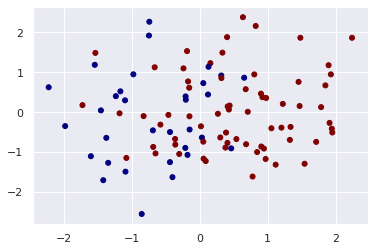

In [0]:
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.jet, s=25)
plt.show()

In [0]:
with pm.Model() as model:
  alpha = pm.Normal('alpha', mu=0, tau=0.001)
  beta_1 = pm.Normal('beta_1', mu=0, tau=0.001)
  beta_2 = pm.Normal('beta_2', mu=0, tau=0.001)
  p = pm.Deterministic('prob', 1/(1.0 + tt.exp(-1*(X[:, 0]*beta_1 + X[:, 1]*beta_2 + X[:, 2]*alpha))))
  observed = pm.Bernoulli('bern_observ', p, observed=X.transpose())
  start = pm.find_MAP()
  step = pm.NUTS(scaling=start)
  trace = pm.sample(10000, step=step, start=start)

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -inf, ||grad|| = 15.164: 100%|██████████| 4/4 [00:00<00:00, 350.42it/s]
Sequential sampling (2 chains in 1 job)
NUTS: [beta_2, beta_1, alpha]
  0%|          | 0/10500 [00:00<?, ?it/s]


SamplingError: ignored

In [0]:
alpha = trace['alpha']

In [0]:
alpha.mean()

In [0]:
beta_1 = trace['beta_1'].mean()

In [0]:
beta_1

In [0]:
 trace['beta_1']

In [0]:
trace.plot()